<div id="toc">
    <h1> Course Specialization - Deep Learning Specialization - Coursera DeepLearning.ai </h1>
    <h2><a href ='https://www.coursera.org/learn/machine-learning-with-python'> https://www.coursera.org/learn/machine-learning-with-python </h2>    
</div>

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#slr">Simple Linear Regression</a></li>
        <li><a href="#mlr">Multiple Linear Regression </a></li>
        <li><a href="#pr">Polynomial Regression</a></li>
        <li><a href="#nlr">Non-linear regression</a></li>
        <li><a href="#knn">K - Nearest Neighbor (KNN)</a></li>
        <li><a href="#dt">Decision Tree</a></li>
        <li><a href="#logis">Logistic Regression using Sigmoid function</a></li>
        <li><a href="#svm">Support Vectom Machine(SVM)</a></li>
    </ol>
</div>
<br>
<hr>

### Libraries

In [1]:
import os
import pandas as pd
import pylab as pl
import numpy as np
import wget
import matplotlib.pyplot as plt
import itertools
%matplotlib inline
import scipy.optimize as opt

from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss

from IPython.display import Image
from sklearn.externals.six import StringIO

from sklearn.metrics import r2_score

ModuleNotFoundError: No module named 'sklearn.externals.six'

<div id="slr">
    <h1> 1. Simple Linear Regression </h1> 
    <h5> <a href="#toc"> Go to top </a> </h5> 
</div>


### May 12, 2020 - Wednesday

#### Downloading the data (using wget)

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

In [3]:
# read the data
emiss_data = pd.read_csv('FuelConsumption.csv')
emiss_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
# data exploration
emiss_data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [5]:
# make all columns lowercase for easiness
emiss_data.columns = list   (  map( lambda x:x.lower(), emiss_data.columns )   )
emiss_data.head()

,modelyear,make,model,vehicleclass,enginesize,cylinders,transmission,fueltype,fuelconsumption_city,fuelconsumption_hwy,fuelconsumption_comb,fuelconsumption_comb_mpg,co2emissions
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
# X_y vars
X_y = emiss_data[  [ 'enginesize', 'cylinders', 'fuelconsumption_comb','co2emissions' ]  ]
X_y.head()

,enginesize,cylinders,fuelconsumption_comb,co2emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


#### variables stat exploration

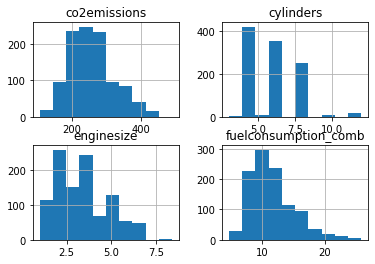

,enginesize,cylinders,fuelconsumption_comb,co2emissions
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [7]:
# histogram
X_y.hist()
plt.show()
X_y.head()

<Figure size 432x288 with 0 Axes>

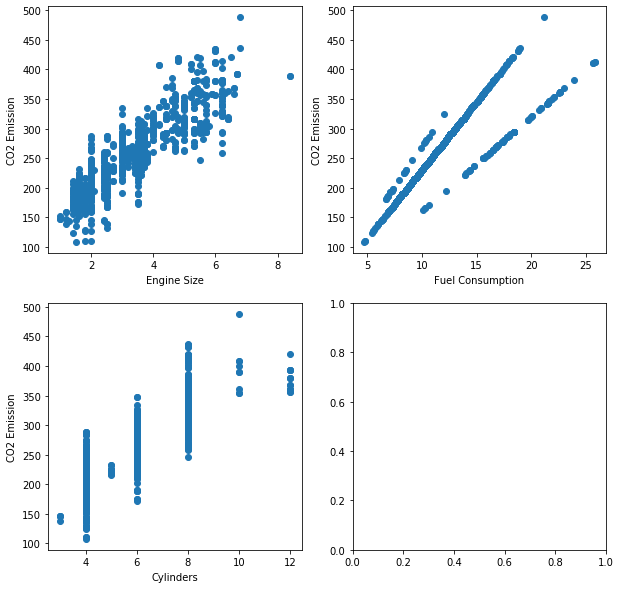

In [8]:
# plot each of these features vs the CO2Emission, to see how linear is their relation
scat_figr = plt.figure()
scat_figr, axes = plt.subplots(nrows= 2, ncols= 2, figsize = (10,10))


axes[0][0].scatter(  X_y['enginesize'], X_y['co2emissions']  )
axes[0][0].set_xlabel('Engine Size', labelpad = 5); axes[0][0].set_ylabel('CO2 Emission', labelpad = 5)

axes[0][1].scatter(  X_y['fuelconsumption_comb'], X_y['co2emissions'] )
axes[0][1].set_xlabel('Fuel Consumption', labelpad = 5); axes[0][1].set_ylabel('CO2 Emission', labelpad = 5)

axes[1][0].scatter( X_y['cylinders'] , X_y['co2emissions'])
axes[1][0].set_xlabel('Cylinders', labelpad = 5); axes[1][0].set_ylabel('CO2 Emission', labelpad = 5)
plt.show()

#### Creating train and test dataset

In [9]:
print(X_y.head())

X = X_y[['enginesize']]
y = X_y[['co2emissions']]


print(X.head()); print(y.head())

# separate X and y train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.20, random_state= 1)

   enginesize  cylinders  fuelconsumption_comb  co2emissions
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
   enginesize
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5
   co2emissions
0           196
1           221
2           136
3           255
4           244


#### Simple Regression Modeling

In [10]:
from sklearn import linear_model

slr_model = linear_model.LinearRegression() 
slr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### modeling parameters

In [11]:
print('Inercept: ', slr_model.intercept_)
print('Coeffs: ', slr_model.coef_)


Inercept:  [124.77059523]
Coeffs:  [[39.4153746]]


##### estimating yi for test data

In [12]:
#approach 1
estimated_y1 = slr_model.predict(X_test)

#approach 2 - use the modelled equation
estimated_y2 = slr_model.intercept_ + slr_model.coef_[0][0] * X_train

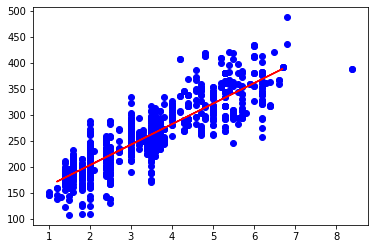

In [13]:
# plotting fit line over the data
plt.scatter(x= X, y= y, color = 'blue' )
plt.plot(X_test, estimated_y1, '-r')

### Model Evaluation : stat parameters

In [14]:
from sklearn.metrics import r2_score

In [15]:
y_hat = estimated_y1

print('Mean Absolute error (MAE): ') ; print(  np.mean(np.absolute(y_hat-y_test))  )
print('\nMean Square error (MSE): ') ; print(  np.mean((y_hat-y_test)**2)  )
print('\nR2 score: '); print( r2_score(y_hat, y_test) )

Mean Absolute error (MAE): 
co2emissions    23.206542
dtype: float64

Mean Square error (MSE): 
co2emissions    955.370765
dtype: float64

R2 score: 
0.7128261218614981


# ------------------------------------------------------------------------------------------------

<div id="mlr">
    <h1> 2. Multiple Regression Model </h1> 
        <h5> <a href="#toc"> Go to top </a> </h5> 
</div>

#### Creating train and test dataset

In [16]:
print(X_y.head())

X = X_y.drop('co2emissions', axis= 1); print(X.head())
y = X_y[['co2emissions']]; print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.20, random_state= 1)

   enginesize  cylinders  fuelconsumption_comb  co2emissions
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
   enginesize  cylinders  fuelconsumption_comb
0         2.0          4                   8.5
1         2.4          4                   9.6
2         1.5          4                   5.9
3         3.5          6                  11.1
4         3.5          6                  10.6
   co2emissions
0           196
1           221
2           136
3           255
4           244


In [17]:
# multiple regression
mlr_model = linear_model.LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### coefficients

In [18]:
print('Inercept: ', mlr_model.intercept_)
print('Coeffs: ', mlr_model.coef_)

Inercept:  [65.17950048]
Coeffs:  [[11.56295409  6.91231122  9.72527271]]


##### Prediction/estimation

In [19]:
estimated_y = mlr_model.predict(X_test)
y_hat = estimated_y

#### Model Evaluation : stat parameters

In [20]:
from sklearn.metrics import r2_score

In [21]:
y_hat = estimated_y

print('Mean Absolute error (MAE): ')
print(  np.mean(np.absolute(y_hat-y_test))  )

print('\nMean Square error (MSE): ')
print(  np.mean((y_hat-y_test)**2)  )

print('\nR2 score: ')
print( r2_score(y_hat, y_test) )

print("\nVariance Score: ")
print( mlr_model.score(X_test, y_test))


# variance Score = 1 - Var(y-y_hat)/var(y)  | Variance score = 1 --> good model, = 0 --> bad model

Mean Absolute error (MAE): 
co2emissions    16.646828
dtype: float64

Mean Square error (MSE): 
co2emissions    546.25914
dtype: float64

R2 score: 
0.8538348878208785

Variance Score: 
0.8653355812644816


# ------------------------------------------------------------------------------------------------

<div id="pr">
    <h1> 3. Polynomial Regression Model </h1> 
        <h5> <a href="#toc"> Go to top </a> </h5> 
</div>

#### Creating train and test dataset

In [22]:
print(X_y.head())

X = X_y[['enginesize']]; print(X.head())
y = X_y[['co2emissions']]; print(y.head())

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.20, random_state= 1)

   enginesize  cylinders  fuelconsumption_comb  co2emissions
0         2.0          4                   8.5           196
1         2.4          4                   9.6           221
2         1.5          4                   5.9           136
3         3.5          6                  11.1           255
4         3.5          6                  10.6           244
   enginesize
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5
   co2emissions
0           196
1           221
2           136
3           255
4           244


### polynomial regression

$y = b_o + b_1 x + b_2 x^2$

$CO2Emission = b_o + b_1 . EngineSize + b_2 . (EngineSize)^2$



In [23]:
# import libs
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [24]:
# model
p_model = PolynomialFeatures(degree= 2)

### Transforming our data to higher order polynomial terms

**fit_transform** takes our x values, and output a list of our data raised from power of 0 to power of 2 (since we set the degree of our polynomial to 2).

$
\begin{bmatrix}
    v_1\\
    v_2\\
    \vdots\\
    v_n
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & v_1 & v_1^2]\\
    [ 1 & v_2 & v_2^2]\\
    \vdots & \vdots & \vdots\\
    [ 1 & v_n & v_n^2]
\end{bmatrix}
$

in our example

$
\begin{bmatrix}
    2.\\
    2.4\\
    1.5\\
    \vdots
\end{bmatrix}
$
$\longrightarrow$
$
\begin{bmatrix}
    [ 1 & 2. & 4.]\\
    [ 1 & 2.4 & 5.76]\\
    [ 1 & 1.5 & 2.25]\\
    \vdots & \vdots & \vdots\\
\end{bmatrix}
$

Polynomial regression is a special case of linear regression. Degree 2 equation would be turn into:

$y = b_o + b_1 x + b_2 x^2$

Now, we can deal with it as 'multiple linear regression' problem.

In [25]:
# fit_transform
X_train_poly = p_model.fit_transform(X_train)

print(X_train)
print(X_train_poly)


      enginesize
56           3.0
301          6.4
992          2.5
893          4.8
54           4.0
...          ...
847          1.6
715          2.5
905          4.8
235          2.4
1061         3.2

[853 rows x 1 columns]
[[ 1.    3.    9.  ]
 [ 1.    6.4  40.96]
 [ 1.    2.5   6.25]
 ...
 [ 1.    4.8  23.04]
 [ 1.    2.4   5.76]
 [ 1.    3.2  10.24]]


In [26]:
# multiple regression
pmlr_model = linear_model.LinearRegression()
pmlr_model.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

##### coefficients

In [27]:
print('Inercept: ', pmlr_model.intercept_)
print('Coeffs: ', pmlr_model.coef_)

Inercept:  [106.28144467]
Coeffs:  [[ 0.         51.02305332 -1.54494647]]


##### Prediction/estimation

In [28]:
## two approaches to estimate y_hat, and both sare same

# converting X_test as higher order (as was done for X_train)
print(X_test.head())
X_test_poly = p_model.fit_transform(X_test)
print(X_test_poly[:6, :])

# y estiamtions
estimated_y1 = pmlr_model.predict( X_test_poly )

estimated_y2 = pmlr_model.intercept_[0] + pmlr_model.coef_[0][1] * X_test_poly[ :, 1] + \
                                          pmlr_model.coef_[0][2] * X_test_poly[ :, 2]

     enginesize
133         3.0
340         1.4
948         2.0
704         2.0
661         4.6
[[ 1.    3.    9.  ]
 [ 1.    1.4   1.96]
 [ 1.    2.    4.  ]
 [ 1.    2.    4.  ]
 [ 1.    4.6  21.16]
 [ 1.    3.    9.  ]]


In [29]:
## confirm both are same/equal
print( (estimated_y1 - estimated_y2).sum() )

y_hat = estimated_y1


-4.3655745685100555e-11


Text(0, 0.5, 'CO2 Emission = bo + b1 ES + b2 ES^2')

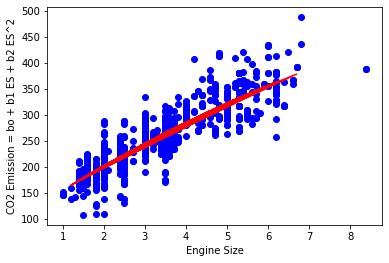

In [30]:
# plotting fit line(curve) over the data
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_test, y_hat, '-r')

plt.xlabel('Engine Size'); plt.ylabel('CO2 Emission = bo + b1 ES + b2 ES^2')

### Model Evaluation : stat parameters

In [31]:
from sklearn.metrics import r2_score

In [32]:
print('Mean Absolute error (MAE): ') ; print(  np.mean(np.absolute(y_hat-y_test))  )
print('\nMean Square error (MSE): ') ; print(  np.mean((y_hat-y_test)**2)  )
print('\nR2 score: '); print( r2_score(y_hat, y_test) )

Mean Absolute error (MAE): 
co2emissions    23.362774
dtype: float64

Mean Square error (MSE): 
co2emissions    950.485451
dtype: float64

R2 score: 
0.7170450435368001


# =============================================================


<div id="nlr">
    <h1> 4. Non-linear regression </h1> 
        <h5> <a href="#toc"> Go to top </a> </h5> 
</div>

## Different curves/functions:

### A Straight line
 $$ y = mx + c $$

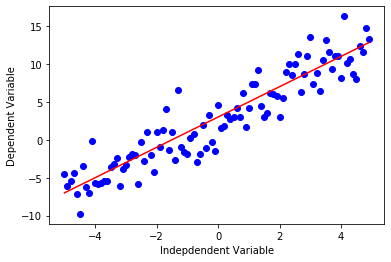

In [33]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Cubic function
$$ \ y = a x^3 + b x^2 + c x + d \ $$

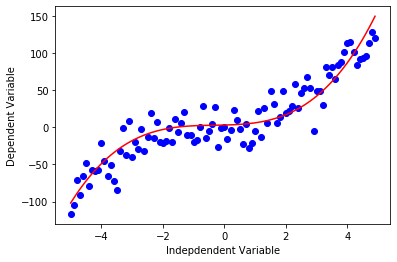

In [34]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Quadratic function
$$ \ y = a x^2 + b x + c  \ $$

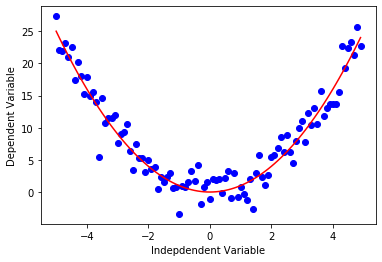

In [35]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Exponential
$$ y = a + b \ c^x$$ 

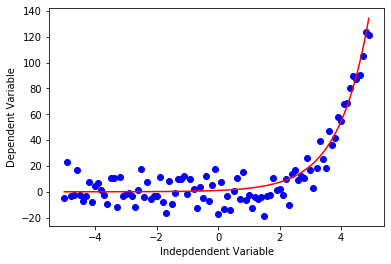

In [36]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph

y= np.exp(x)

y_noise = 10 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')


plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Logarithmic
$$ y = \ a \ log\ (b \ x)$$

C:\Users\A7MYB\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


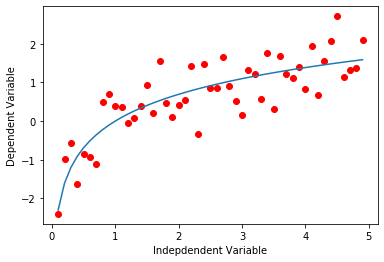

In [37]:
X = np.arange(-5.0, 5.0, 0.1)

Y = np.log(X)
y_noise =  0.5 * np.random.normal(size=x.size)
ydata = Y + y_noise
plt.plot(x, ydata,  'ro')

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

### Sigmoidal/Logistic
$$ y = a + \frac{b}{1+ c^{(x-d)}}$$

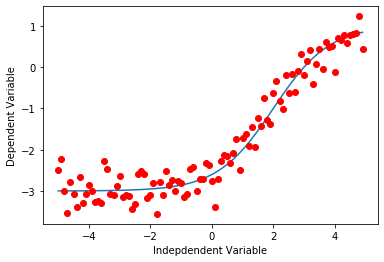

In [38]:
X = np.arange(-5.0, 5.0, 0.1)


Y = 1-4/(1+np.power(3, X-2))


y_noise =  0.3 * np.random.normal(size=x.size)
ydata = Y + y_noise


plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')

plt.plot(x, ydata,  'ro')
plt.show()

###  Non-Linear Regression example

#### Data

In [39]:
# downlaoding the data
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
china_gdp_data =pd.read_csv('china_gdp.csv')
china_gdp_data.head()

2020-05-17 21:30:18 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


#### Separating the Dataset


In [40]:
plt.figure(figsize= (8,5))
X = china_gdp_data[['Year']]
y = china_gdp_data[['Value']]

print(X.head(), '\n\n', y.head())

   Year
0  1960
1  1961
2  1962
3  1963
4  1964 

           Value
0  5.918412e+10
1  4.955705e+10
2  4.668518e+10
3  5.009730e+10
4  5.906225e+10


<Figure size 576x360 with 0 Axes>

#### plotting the data

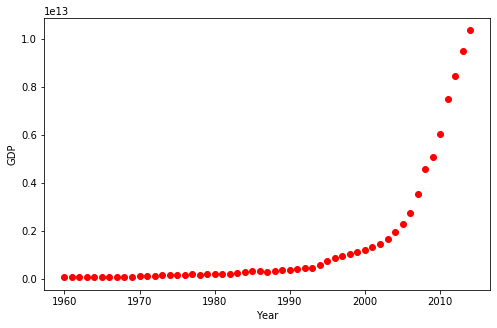

In [41]:
plt.figure(figsize= (8,5))
plt.plot(X, y, 'ro')
plt.xlabel('Year'); plt.ylabel('GDP')
plt.show()

### Choosing an appropriate model

From an initial look at the plot, we determine that the logistic function could be a good approximation,
since it has the property of starting with a slow growth, increasing growth in the middle, and then decreasing again at the end; as illustrated below:

The equation of a logistic function is:
$$ \hat{Y} = \frac1{1+e^{\beta_1(X-\beta_2)}}$$

$\beta_1$: Controls the curve's steepness,

$\beta_2$: Slides the curve on the x-axis.

### Building A Model


In [42]:
def sigmoid_func(X, beta1, beta2):
    y = 1 / ( 1 + np.exp(-beta1 * (X-beta2) ) )
    return y

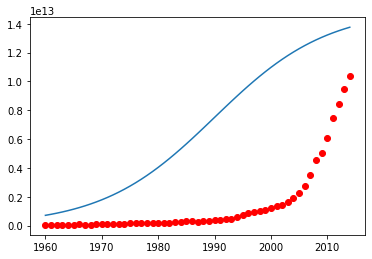

In [43]:
# a random value of b1 & b2 to fit the data into the sigmoid funct
beta1 = 0.1
beta2 = 1990

# sigmoid/logistic function
y_hat = sigmoid_func(X, beta1, beta2)

# plot the y estimation
plt.plot(X, y_hat*15000000000000.0)
plt.plot(X, y, 'ro')

In [44]:
# normalize our data
X_norm = X/X.max()
y_norm = y/y.max()

### Fitting the sigmoid/logistic model ###
#### How we find the best parameters for our fit line?
we can use __curve_fit__ which uses non-linear least squares to fit our sigmoid/logistic model, to data.
Optimal values for the parameters so that the sum of the squared residuals (SSE) of sigmoid(xdata, *optmz_para) - ydata is minimized.

optmz_para = optimized parameters.

In [45]:
#lib
from scipy.optimize import curve_fit

In [46]:
# curve_fir takes variables as np array --> convert df to np array 
# also ravel() is also required
X_norm_arr = X_norm.to_numpy().ravel()
y_norm_arr = y_norm.to_numpy().ravel()

optmz_para, pcov = curve_fit( f= sigmoid_func,
                                  xdata= X_norm_arr, ydata= y_norm_arr)

##### coefficients


In [47]:
print('beta1 ', optmz_para[0])
print('beta2 ', optmz_para[1])

beta1  690.4517109968472
beta2  0.9972071272536187


##### y estimation

In [48]:
y_hat = sigmoid_func(X_norm_arr, *optmz_para)

####  plot our resulting regression model.

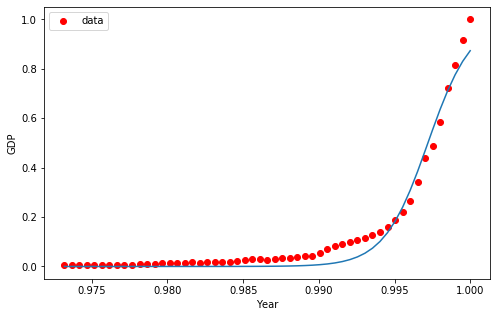

In [49]:
plt.figure( figsize= (8,5) )

plt.plot(X_norm_arr, y_norm_arr, 'ro', label = 'data')

plt.plot(X_norm_arr , y_hat)

plt.legend(loc = 'best')
plt.ylabel('GDP'); plt.xlabel('Year')

plt.show()

#### Model Evaluation : stat parameters

In [50]:
from sklearn.metrics import r2_score

In [51]:
y_hat 
X_test = X_norm_arr
y_test = y_norm_arr

print('Mean Absolute error (MAE): ')
print(  np.mean(np.absolute(y_hat-y_test))  )

print('\nMean Square error (MSE): ')
print(  np.mean((y_hat-y_test)**2)  )

print('\nR2 score: ')
print( r2_score(y_hat, y_test) )

Mean Absolute error (MAE): 
0.030495070474619468

Mean Square error (MSE): 
0.0015564975055692603

R2 score: 
0.9724016820488531


 ========================================================================================================================

<div id="knn">
    <h1> 5. K - Nearest Neighbor (KNN) </h1> 
        <h5> <a href="#toc"> Go to top </a> </h5> 
</div>

#### Visualization of the K-Nearest Neighbors algorithm.

<img src="https://ibm.box.com/shared/static/mgkn92xck0z05v7yjq8pqziukxvc2461.png" style = 'width:500px; height:375px'> 


In [ ]:
#![title](KNN_Diagram.png)

#### Data

In [53]:
# download data
!wget -O teleCust1000t.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv

# load from csv
tel_data = pd.read_csv('teleCust1000t.csv')
tel_data.head()

--2020-05-17 21:30:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37048 (36K) [text/csv]
Saving to: 'teleCust1000t.csv'

     0K .......... .......... .......... ......               100%  301K=0.1s

2020-05-17 21:30:20 (301 KB/s) - 'teleCust1000t.csv' saved [37048/37048]



,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


### Data Visualization and Analysis

In [54]:
tel_data['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

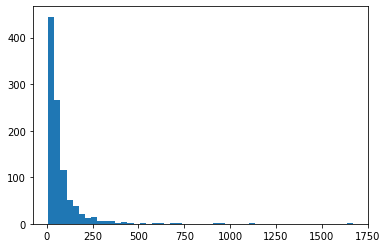

In [55]:
# histogram
plt.hist( x = tel_data['income'], bins= 50 )
plt.show()

#### define features n targets

In [56]:
print(tel_data.columns)

X = tel_data.drop( 'custcat', axis = 1 ); print(X.head())
y = tel_data['custcat']; print('\n',y.head())

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')
   region  tenure  age  marital  address  income  ed  employ  retire  gender  \
0       2      13   44        1        9    64.0   4       5     0.0       0   
1       3      11   33        1        7   136.0   5       5     0.0       0   
2       3      68   52        1       24   116.0   1      29     0.0       1   
3       2      33   33        0       12    33.0   2       0     0.0       1   
4       2      23   30        1        9    30.0   1       2     0.0       0   

   reside  
0       2  
1       6  
2       2  
3       1  
4       4  

 0    1
1    4
2    3
3    1
4    3
Name: custcat, dtype: int64


#### Normalizing data
Data Standardization give data zero mean and unit variance as we will be calculating distance in KNN

In [57]:
from sklearn.preprocessing import St 0andardScaler

#### Normalizing / standarizing

In [58]:
# preferable approach
scaled_X = preprocessing.StandardScaler().fit(X).transform(X)

# see below for formula

NameError: name 'preprocessing' is not defined

The standard score of a sample x is calculated as:

z = (x - mean) / std

#### Train Test Split  

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y,
                                                     test_size= 0.33, random_state= 4)

### Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#### Training
Lets start the algo with k = 4 for now

In [ ]:
Kn = 4

# Training the model
knn_model = KNeighborsClassifier(n_neighbors= Kn).fit(X_train, y_train)
knn_model

#### Estimating/Predicting

In [ ]:
y_hat = knn_model.predict(X_test)
y_hat[:20]

### Accuracy evaluation
In multilabel classification, __accuracy classification score__ is a function that computes subset accuracy.

This function is equal to the __Jaccard_similarity_score__ function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

print( 'Train Set Accuracy: ', metrics.accuracy_score(y_train, knn_model.predict(X_train)) )
print( 'Test Set Accuracy: ', metrics.accuracy_score(y_test, y_hat) )

print('\nClassification Report:\n ', classification_report(y_test, y_hat) )
print('\n Confusion Matrix:\n', confusion_matrix(y_test, y_hat) )

#### Building the model again with K = 6

In [ ]:
Kn = 6
knn_model = KNeighborsClassifier(n_neighbors = Kn).fit(X_train,y_train)
y_hat = knn_model.predict(X_test)
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

print('\nClassification Report:\n ', classification_report(y_test, y_hat) )
print('\n Confusion Matrix:\n', confusion_matrix(y_test, y_hat) )

### Finding Optimum value ok K
K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve train data for testing the accuracy of the model. Then chose k = 1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

#### Approach I - using error count and model accuracy

In [ ]:
## calculating model error count for different Ks
Ks = 135
mean_error_count = []
Accuracy_Score = []
for each_Ki in range(1, Ks):
        _knn_model_ = KNeighborsClassifier(n_neighbors= each_Ki).fit(X_train,y_train)
        y_hat = _knn_model_.predict(X_test)
        
        # Error count
        mean_error_count.append( np.mean(y_hat!=y_test) )
        
        # Model accuracy
        Accuracy_Score.append( metrics.accuracy_score(y_test,y_hat) )
        
# min is found in K = 44

In [ ]:
## plotting the error vs K 
plt.figure(figsize=(10,6))
plt.plot(range(1,Ks), mean_error_count,
        color = 'red', linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'blue', markersize = 4)
plt.title("Optimal K value"); plt.xlabel('K'); plt.ylabel('Error Count')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(range(1,Ks), Accuracy_Score,
        color = 'blue', linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'red', markersize = 4)
plt.title("Optimal K value"); plt.xlabel('K'); plt.ylabel('Error Count')
plt.show()

#### Approach II

In [ ]:
### calculating model accuracy

Ks = 135
mean_accuracy = np.zeros(Ks-1)
stdDev_accuracy = np.zeros(Ks-1)

for each_Ki in range(1,Ks):
    _knn_model_ = KNeighborsClassifier(n_neighbors= each_Ki).fit(X_train, y_train)
    y_hat = _knn_model_.predict(X_test)
    
    # Accuracy
    mean_accuracy[each_Ki-1] = metrics.accuracy_score(y_test,y_hat)
    
    # not imp - optional
    stdDev_accuracy[each_Ki-1] = np.std(y_hat==y_test) / np.sqrt(y_hat.shape[0])

In [ ]:
## plotting the Accuracy vs K 
plt.figure(figsize=(10,6))
plt.plot( range(1,Ks), mean_accuracy,
          color = 'green', linestyle = 'dashed')

fill_Area1 = mean_accuracy - stdDev_accuracy
fill_Area2 = mean_accuracy + stdDev_accuracy

plt.fill_between( range(1,Ks),
                fill_Area1, fill_Area2,
                alpha = 0.1)

plt.title("Optimal K value"); plt.xlabel('K'); plt.ylabel('Accuracy')
plt.legend(('Accuracy ' , '+/- 3 x StdDev'))

plt.tight_layout()
plt.show()

In [ ]:
# Best accuracy with Ks = 
print( "The lowest error was with", np.array(mean_error_count).min(),
      "for K =", np.array(mean_error_count).argmin()) 

print( "\nThe best accuracy was with", mean_accuracy.max(),
      "with k = ", mean_accuracy.argmax()+1) 

### Model Evualuation with optimum k

In [ ]:
Kn = 6

knn_model = KNeighborsClassifier(n_neighbors = Kn).fit(X_train,y_train)

y_hat = knn_model.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

print('\nClassification Report:\n ', classification_report(y_test, y_hat) )
print('\n Confusion Matrix:\n', confusion_matrix(y_test, y_hat) )

In [ ]:
Kn = 44

knn_model = KNeighborsClassifier(n_neighbors = Kn).fit(X_train,y_train)

y_hat = knn_model.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

print('\nClassification Report:\n ', classification_report(y_test, y_hat) )
print('\n Confusion Matrix:\n', confusion_matrix(y_test, y_hat) )

In [ ]:
Kn = 63

knn_model = KNeighborsClassifier(n_neighbors = Kn).fit(X_train,y_train)

y_hat = knn_model.predict(X_test)

print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_hat))

print('\nClassification Report:\n ', classification_report(y_test, y_hat) )
print('\n Confusion Matrix:\n', confusion_matrix(y_test, y_hat) )


========================================================================================================================

<div id="dt">
    <h1> 6. Decision Tree </h1> 
        <h5> <a href="#toc"> Go to top </a> </h5> 
</div>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

<div id="about_dataset">
    <h2>About the dataset</h2>
    Imagine that you are a medical researcher compiling data for a study. You have collected data about a set of patients, all of whom suffered from the same illness. During their course of treatment, each patient responded to one of 5 medications, Drug A, Drug B, Drug c, Drug x and y. 
    <br>
    <br>
    Part of your job is to build a model to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, and Cholesterol of patients, and the target is the drug that each patient responded to.
    <br>
    <br>
    It is a sample of binary classifier, and you can use the training part of the dataset 
    to build a decision tree, and then use it to predict the class of a unknown patient, or to prescribe it to a new patient.
</div>

### Downloading the data

In [ ]:
!wget -O drug200.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv

In [ ]:
data_fileName = 'drug200.csv'

drug_data = pd.read_csv(data_fileName); drug_data.head()

#### Preparing X & y

In [ ]:
X = drug_data.drop('Drug', axis = 1)
y = drug_data[['Drug']]
print(X.head(), '\n', y.head())

#### Converting _Categorical Data_ into _Indicator Variable_
Some features in this dataset are categorical such as __Sex__ or __BP__. Unfortunately, Sklearn Decision Trees do not handle categorical variables. But still we can convert these features to numerical values. 

Dummies variables can be constructed using __pandas.get_dummies()__ to convert the variable into 1 or 0 (binary form) than multi-class from(1,2,3,4)

In [ ]:
from sklearn import preprocessing

In [ ]:
dum_sex = preprocessing.LabelEncoder().fit( ['F','M'] ).transform(X['Sex'])
dum_bp = preprocessing.LabelEncoder().fit( ['LOW','NORMAL','HIGH'] ).transform(X['BP'])
dum_chl = preprocessing.LabelEncoder().fit( ['HIGH', 'NORMAL'] ).transform(X['Cholesterol'])

X['Sex'] = dum_sex
X['BP'] = dum_bp
X['Cholesterol'] = dum_chl

X.head()

#### Creating train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

### Decision Tree Modeling

In [ ]:
dtree_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4)
print(dtree_model)
## see the default parameters

In [ ]:
dtree_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 4).fit(X_train,y_train)

##### Estimating / predicting

In [ ]:
y_hat = dtree_model.predict(X_test)
y_hat

### Model Evaluation : stat parameters

In [ ]:
from sklearn import metrics
print('Decision Accuracy: ')
print(metrics.accuracy_score(y_test, y_hat))

the metrics.accuracy_score(y_test, y_hat) is just no of correct prediction/(total # y_test)

#### Visualizing the Tree

In [ ]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

You might need to install the pydotplus and graphviz libraries"

conda install -c conda-forge pydotplus -y

conda install -c conda-forge python-graphviz -y


In [ ]:
img_fileName = (os.path.splitext(os.path.basename(data_fileName))[0]) + '_' + 'dTree.png'

dot_data = StringIO()

X_name = drug_data.columns[:5]
y_name = drug_data['Drug'].unique().tolist(); y_name

output_img = tree.export_graphviz(decision_tree= dtree_model,
                                  feature_names= X_name, class_names= y_name,
                                  out_file= dot_data,
                                  filled= True, rotate= False)

graph_dtree = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph_dtree.write_png(img_fileName)

img = mpimg.imread(img_fileName)

plt.figure(figsize= (100,200))
plt.imshow(img, interpolation= 'nearest')
plt.show()

========================================================================================================================

<div id="logis">
    <h1> 7. Logistic Regression using Sigmoid function </h1> 
        <h5> <a href="#toc"> Go to top </a> </h5> 
</div>

<a id="ref1"></a>
##   Linear vs. Logistic Regression

While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, Simple linear regression assumes a function of the form:
<br><br>
$$
y = b_0 + b_1  x_1 + b_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $b_0, b_1, b_2$, etc, where the term $b_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
h_b(x) = b^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, useful when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression and transforming the numeric estimate into a probability with the following function, which is called sigmoid function ??:

$$
h_b(x) = \sigma({b^TX}) =  \frac {{1}}{1 + e^{-(b_0 + b_1  x_1 + b_2  x_2 +\cdots)}}
$$
Or:
$$
Probability of a Class_1 =  P(Y=1|X) = \sigma({b^TX}) = \frac{{1}}{1+e^{-(b^TX)}} 
$$

In 2 dimension for y = f(x):
$$
y(x) = \sigma({b^Tx}) =  \frac {{1}}{1 + e^{-(b_0 + b_1  x_1 )}}
$$
In 3 dimension for z = f(x,y):
$$
z(x) = \sigma({b^TX}) =  \frac {{1}}{1 + e^{-(b_0 + b_1  x_1 + b_2  x_2   )}}
$$


In this equation, ${b^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(b^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img
src="https://ibm.box.com/shared/static/kgv9alcghmjcv97op4d6onkyxevk23b1.png" width="400" align="center">


The objective of __Logistic Regression__ algorithm, is to find the best parameters b, for $h_b(x)$ = $\sigma({b^TX})$, in such a way that the model best predicts the class of each case.

<h2 id="about_dataset">About the dataset</h2>
We will use a telecommunications dataset for predicting customer churn. T
Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 


This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.



The dataset includes information about:
- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents


### Download the data

In [ ]:
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

In [ ]:
# load Data

In [199]:
data_fileName = 'ChurnData.csv'

data_df = pd.read_csv(data_fileName)
data_df.head()

# managing variables:
X = data_df[ ['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless'] ]
y = data_df[ ['churn'] ].astype(int)  # <- y/target as interger rather than float
# dataframe with both X & y
y_X = pd.concat( [y,X], axis =1 ); y_X.head()

# normalize the X variables/features
scaled_X = preprocessing.StandardScaler().fit(X).transform(X)
X = pd.DataFrame(scaled_X, columns = X.columns); X.head()

# Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.33, random_state=42)

### Modeling (Logistic Regression with Scikit-learn)

Building our model using __LogisticRegression__ from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. There are pros and cons of these optimizers.

The version of Logistic Regression in Scikit-learn, support regularization. Regularization is a technique used to solve the overfitting problem in machine learning models.
__C__ parameter indicates __inverse of regularization strength__ which must be a positive float. Smaller values specify stronger regularization. 

In [200]:
model = LogisticRegression(C= 0.01, solver= 'liblinear').fit(X_train,y_train)
print(model)

## estimation/prediction
y_hat = model.predict(X_test)
print(y_hat)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
[1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0]


C:\Users\A7MYB\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The first column is the probability of class 1, P(Y=1|X), and second column is probability of class 0, P(Y=0|X):

In [201]:
# prediction with probability
y_hat_prob = model.predict_proba(X_test)
y_hat_prob[:10]

array([[0.46, 0.54],
       [0.36, 0.64],
       [0.58, 0.42],
       [0.57, 0.43],
       [0.52, 0.48],
       [0.38, 0.62],
       [0.73, 0.27],
       [0.46, 0.54],
       [0.48, 0.52],
       [0.7 , 0.3 ]])

### Evaluation

#### Jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.


In [202]:
from sklearn.metrics import jaccard_similarity_score
J_score = jaccard_similarity_score(y_test,y_hat)
print(J_score)

# Classification Report
print( 'Classification Report:\n')
print(classification_report(y_test, y_hat))

# Confusion Matrix
print('\n\nConfusion Matrix:\n')
print(confusion_matrix(y_test,y_hat))

0.7121212121212122
Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.74      0.80        50
           1       0.43      0.62      0.51        16

    accuracy                           0.71        66
   macro avg       0.65      0.68      0.65        66
weighted avg       0.76      0.71      0.73        66



Confusion Matrix:

[[37 13]
 [ 6 10]]


C:\Users\A7MYB\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [203]:
# User-defined function to plot confusion matrix (Optional)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

[[37 13]
 [ 6 10]]
Confusion matrix, without normalization
[[37 13]
 [ 6 10]]


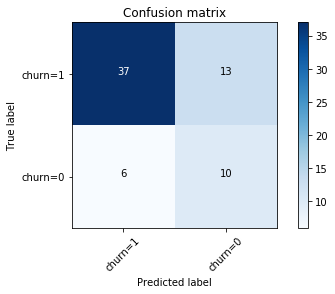

In [206]:
# Plot confusion matrix
print(confusion_matrix(y_test,y_hat))

plt.figure()
plot_confusion_matrix( confusion_matrix(y_test,y_hat),
                      classes=['churn=1','churn=0'],
                      normalize= False,
                      title='Confusion matrix')

Based on the count of each section, we can calculate precision and recall of each label:


- __Precision__ is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP)

- __Recall__ is true positive rate. It is defined as: Recall =  TP / (TP + FN)

    
So, we can calculate precision and recall of each class.

__F1 score:__
Now we are in the position to calculate the F1 scores for each label based on the precision and recall of that label. 

The F1 score is the harmonic average of the precision and recall, where an F1 score reaches its best value at 1 (perfect precision and recall) and worst at 0. It is a good way to show that a classifer has a good value for both recall and precision.


And finally, we can tell the average accuracy for this classifier is the average of the F1-score for both labels, which is 0.72 in our case.

### log loss
Calculate try __log loss__ for evaluation.

In logistic regression, the output can be the probability of customer churn is yes (or equals to 1). This probability is a value between 0 and 1.
Log loss( Logarithmic loss) measures the performance of a classifier where the predicted output is a probability value between 0 and 1. 


In [ ]:
from sklearn.metrics import log_loss
log_loss(y_test, y_hat_prob)

========================================================================================================================

<div id="svm">
    <h1>8. Support Vector Machine</h1> 
        <h5> <a href="#toc"> Go to top </a> </h5> 
</div>

#### Dataset info
The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

|Field name|Description|
|--- |--- |
|ID|Clump thickness|
|Clump|Clump thickness|
|UnifSize|Uniformity of cell size|
|UnifShape|Uniformity of cell shape|
|MargAdh|Marginal adhesion|
|SingEpiSize|Single epithelial cell size|
|BareNuc|Bare nuclei|
|BlandChrom|Bland chromatin|
|NormNucl|Normal nucleoli|
|Mit|Mitoses|
|Class|Benign or malignant|

The ID field contains the patient identifiers. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the most benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [64]:
# download data
!wget -O cell_samples.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv

--2020-05-17 21:39:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20675 (20K) [text/csv]
Saving to: 'cell_samples.csv'

     0K .......... ..........                                 100% 8.98M=0.002s

2020-05-17 21:39:46 (8.98 MB/s) - 'cell_samples.csv' saved [20675/20675]



In [145]:
# load data
data_fileName = 'cell_samples.csv'
data_df = pd.read_csv(data_fileName); data_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


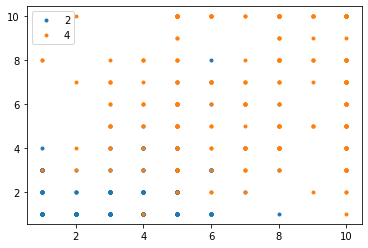

In [128]:
# distribution of the classes based on Clump thickness and Uniformity of cell size
np.random.seed(1974)

class_grp = data_df.groupby(['Class'])

# plot by class
fig, ax = plt.subplots()

for each_name, each_grp in class_grp:
    ax.plot(each_grp['Clump'], each_grp['UnifShape'],
            marker = 'o', linestyle = '', ms= 3, label= each_name)
ax.legend()
plt.show()

#### Data pre-processing and selection

In [129]:
data_df.info()
# on inspection, we find that we need to convert BareNuc colmn into numeric
#print(data_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           699 non-null    int64 
 1   Clump        699 non-null    int64 
 2   UnifSize     699 non-null    int64 
 3   UnifShape    699 non-null    int64 
 4   MargAdh      699 non-null    int64 
 5   SingEpiSize  699 non-null    int64 
 6   BareNuc      699 non-null    object
 7   BlandChrom   699 non-null    int64 
 8   NormNucl     699 non-null    int64 
 9   Mit          699 non-null    int64 
 10  Class        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [163]:
# converting BareNuc col into Int64 (and not simplt int as there are null values) 
data_df['BareNuc']= pd.to_numeric(data_df['BareNuc'],
                                  errors= 'coerce').astype('Int64')
data_df.info()

# select only those row which doesn't have null
data_df = data_df [data_df['BareNuc'].notnull() ]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    683 non-null    int64
 4   MargAdh      683 non-null    int64
 5   SingEpiSize  683 non-null    int64
 6   BareNuc      683 non-null    Int64
 7   BlandChrom   683 non-null    int64
 8   NormNucl     683 non-null    int64
 9   Mit          683 non-null    int64
 10  Class        683 non-null    int64
dtypes: Int64(1), int64(10)
memory usage: 64.7 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ID           683 non-null    int64
 1   Clump        683 non-null    int64
 2   UnifSize     683 non-null    int64
 3   UnifShape    68

C:\Users\A7MYB\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [164]:
X = data_df[ ['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit'] ]
y = data_df[ 'Class' ]
y_X = pd.concat([y,X], axis= 1); y_X.head()

,Class,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,2,5,1,1,1,2,1,3,1,1
1,2,5,4,4,5,7,10,3,2,1
2,2,3,1,1,1,2,2,3,1,1
3,2,6,8,8,1,3,4,3,7,1
4,2,4,1,1,3,2,1,3,1,1


#### Train Test Split 


In [166]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

#### SVM Modeling

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

    1.Linear
    2.Polynomial
    3.Radial basis function (RBF)
    4.Sigmoid
Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results.

In [168]:
from sklearn import svm
svm_model = svm.SVC(kernel= 'rbf').fit(X_train,y_train)
svm_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

#### Evaluation

In [181]:
# prediction
y_hat = svm_model.predict(X_test)

# confusion matrix
confuse_mat = confusion_matrix(y_test, y_hat, labels=[2,4])
print(confuse_mat)
print (classification_report(y_test, y_hat))


[[85  5]
 [ 0 47]]
              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [182]:
# User-defined function to plot confusion matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
plot_confusion_matrix( confusion_matrix(y_test,y_hat),
                      classes=['churn=1','churn=0'],
                      normalize= False,
                      title='Confusion matrix')

Confusion matrix, without normalization
[[37 13]
 [ 6 10]]


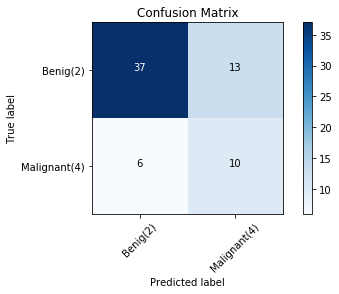

In [213]:
# Plot non-normalized confusion matrix

plt.figure()
plot_confusion_matrix(confusion_matrix(y_test, y_hat),
                     classes= [ 'Benig(2)', 'Malignant(4)' ],
                     normalize= False,
                     title= 'Confusion Matrix')

In [214]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_hat, average='weighted') )

from sklearn.metrics import jaccard_similarity_score
print(jaccard_similarity_score(y_test, y_hat))

0.7271223400255657
0.7121212121212122
